# Análisis de filtros discretos

## Introducción
Implementar un filtro digital consiste en:
* Realizar los cálculos necesarios para calcular una muestra de la salida cada vez que llega una nueva muestra de entrada.

La manera normal de hacerlo es mediante una ecuación en diferencias

$y[n] = b_0 x[n] + b_1 x[n-1] + \cdots + b_M x[n-M]+ a_1 y[n-1]+ \cdots +a_N y [n-N]$ 


***Proceso para ir calculando muestras de la salida a medida que llegan muestras de entrada***
    
<img title="Filtrado IIR" alt="Filtrado IIR" src="images/Filtrado_IIR.gif" width=500  >




Dando valores adecuados a $b_i$ y $a_i$ es posible lograr efectos tan diferentes como:

* Aumentar o disminuir los agudos/graves
* Realizar promediados con ponderaciones muy flexibles
* Atenuar mucho ciertas frecuencias
* ...

De teoría sabemos que cualquier filtro (sistema LTI) queda totalmente caracterizado por:
* Respuesta impulsional
* Respuesta en frecuencia


Los coeficientes de la ecuación en diferencias se suelen manejar empleando **vectores** de coeficientes.

El vector de coeficientes B (no-recursivos) es simplemente  B=[b0, b1, ..., bM]

El vector de los coeficientes A (recursivos) se obtiene poniendo todos los términos con "y" a la izquierda del "=":

$y[n] - a_1 y[n-1]- \cdots - a_N y [n-N] = b_0 x[n] + b_1 x[n-1] + \cdots + b_M x[n-M]$ 

y poniendo en un vector los coeficientes con el signo que han quedado:

A=[1, -a1, ..., -aN]


### Objetivo del cuaderno
En esta práctica veremos como dados unos coeficientes B, A, es posible obtener la respuesta impulsional y en frecuencia.

Ambas están relacionadas por la transformada de Fourier por lo que conocida una de las dos es posible conocer la otra.

Emplearemos estas funciones

[Respuesta impulsional : scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)

[Respuesta en frecuencia: scipy.signal.freqz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html)


También veremos cómo filtrar una señal de audio usando los coeficientes, y la frecuencia de corte *analógica* equivalente.


In [2]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from scipy import signal

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)


import math
import cmath

import warnings
warnings.filterwarnings('ignore')

import upv_audio

np.set_printoptions(precision=4)

from UPVlog import UPVlog

mylogger = UPVlog("Análisis de filtros digitales")

### Carga de los coeficientes de dos filtros

A continuación cargaremos los coeficientes de dos filtros:

* Filtro 1: *B1, A1*

* Filtro 2: *B2, A2*

In [4]:
#Cargamos los coeficientes
mylogger.log("Cargando coeficientes")
coeficientes = np.load('data/coeficientes.npz')

# coeficientes es un diccionario con las siguientes keys:

print("Campos del diccionario 'coeficientes':")
for v in coeficientes.keys():
    print (v)

Campos del diccionario 'coeficientes':
A1
B1
A2
B2


In [5]:
# Generamos las variables de coeficientes para trabajar más cómodamente
A1=coeficientes['A1']
B1=coeficientes['B1']
A2=coeficientes['A2']
B2=coeficientes['B2']


# e imprimimos los valores de los coeficientes
print('A1=',A1)
print('B1=',B1)
print('A2=',A2)
print('B2=',B2)

A1= [ 1.0000e+00 -4.9960e-16  7.7770e-01 -2.2730e-16  1.1420e-01 -1.3575e-17
  1.7509e-03]
B1= [0.0296 0.1775 0.4438 0.5918 0.4438 0.1775 0.0296]
A2= 1
B2= [ 1.5573e-18  1.6267e-03 -2.0973e-18 -3.0016e-03  3.6522e-18  5.9745e-03
 -6.0344e-18 -1.1059e-02  8.9566e-18  1.9074e-02 -1.2066e-17 -3.1669e-02
  1.4989e-17  5.3133e-02 -1.7371e-17 -9.9436e-02  1.8926e-17  3.1568e-01
  4.9936e-01  3.1568e-01  1.8926e-17 -9.9436e-02 -1.7371e-17  5.3133e-02
  1.4989e-17 -3.1669e-02 -1.2066e-17  1.9074e-02  8.9566e-18 -1.1059e-02
 -6.0344e-18  5.9745e-03  3.6522e-18 -3.0016e-03 -2.0973e-18  1.6267e-03
  1.5573e-18]


## Respuesta impulsiva
Para determinarla simplemente se genera un vector de señal de entrada que sea todo cero excepto la primera muestra y se filtra.

Es decir, se **genera una delta** y **se filtra** (definición de respuesta impulsiva)

>
> Se suelen **emplear minúsculas para las respuesta impulsivas**
>

Determinar la respuesta impulsiva de los filtros 1 y 2:

* Generando una *delta*

* Filtrándola


In [7]:
# Commpletar los valores de delta y h1
# La longitud de delta debe estar entre 35 y 50
mylogger.log("Obteniendo h1")
delta= None
h1 = None

### BEGIN SOLUTION
delta= np.zeros(50)
delta[0]=1
h1=signal.lfilter(B1,A1,delta)
### END SOLUTION


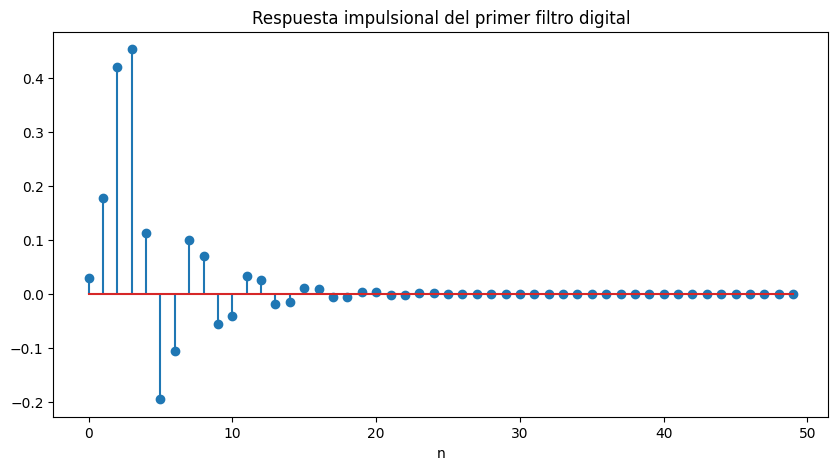

In [8]:
# Compruebe que estos tests no dan errores
mylogger.log("Testing  h1")
### BEGIN TESTS
assert delta is not None and h1 is not None, "No realizado"
assert len(delta) == len(h1), "las longitudes de delta y h1 deben ser iguales"
assert len(delta) >= 35 and len(delta) <=50,"Las longitudes deben estar entre 35 y 50"
assert np.max(np.abs(delta[1:]))< 1e-20, "Valor incorrecta de delta"
assert delta[0] ==1, "Valor incorrecto de delta"
assert np.max(h1) > 0.4,"Valor de h1 incorrecto"
assert np.min(h1)< -0.15,"Valor de h1 incorrecto"
assert np.max(np.abs(h1))<0.5 ,"Valor de h1 incorrecto"
assert np.max(np.abs(h1[25:]))<0.01 ,"Valor de h1 incorrecto"
### END TESTS
mylogger.log("Success Testing  h1")

# Representamos gráficamente el resultado
_=plt.stem(h1)
_=plt.title('Respuesta impulsional del primer filtro digital')
_=plt.xlabel('n')

**Observaciones**

Se ve que va decreciendo exponencialmente hacia cero. 

Cuando la respuesta impulsional decrece **asintóticamente** a cero, como su duración es infinita se llama **IIR**


In [10]:
# Usando el vector delta anterior, deteminar la respuesta impulsiva del segundo filtro
mylogger.log("Obteniendo  h2")
h2=None
### BEGIN SOLUTION
h2=signal.lfilter(B2,A2,delta)
### END SOLUTION


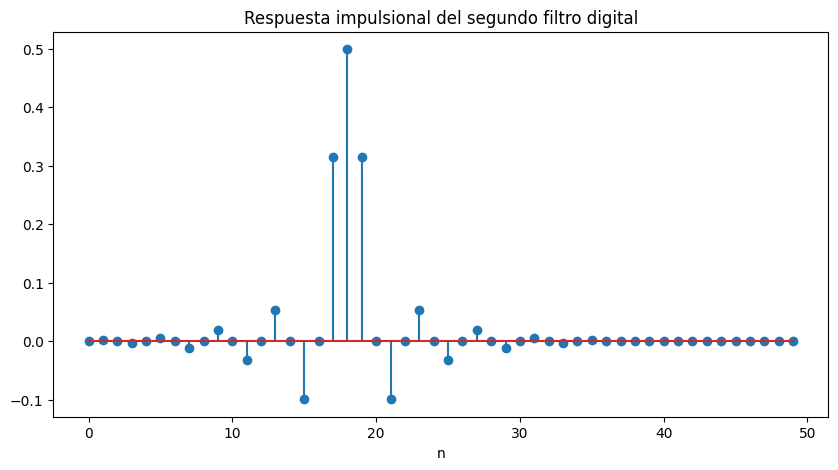

In [11]:
# Compruebe que estos tests no dan errores
mylogger.log("Testing h2")

### BEGIN TESTS
assert delta is not None and h2 is not None, "No realizado"
assert len(delta) == len(h2), "las longitudes de delta y h1 deben ser iguales"
assert len(delta) >= 35 and len(delta) <=50,"Las longitudes deben estar entre 35 y 50"
assert np.max(h2) > 0.4,"Valor de h2 incorrecto"
assert np.min(h2)< -0.05,"Valor de h2 incorrecto"
assert np.max(np.abs(h2))<0.5 ,"Valor de h2 incorrecto"
assert np.max(np.abs(h2[:3]))<0.01 ,"Valor de h2 incorrecto"
assert np.max(np.abs(h2[33:]))<0.01 ,"Valor de h2 incorrecto"
### END TESTS
mylogger.log("Success Testing h2")
# Representamos gráficamente el resultado

_=plt.stem(h2)
_=plt.title('Respuesta impulsional del segundo filtro digital')
_=plt.xlabel('n')

**Observaciones**

* Recuerda a una sinc truncada

* Las últimas muestras son exactamente cero, es decir **tiene duración infinita**.

* En realidad lo que vemos son las primeras  muestras de la respuesta impulsional.

* Este tipo de filtros se llama **FIR** por tener respuesta impulsiva finita.

  * Se reconocen porque el denominador A2==1
  
  * Tienen ciertas propiedades buenas:
    * Retardo constante para todas las frecuencias (fase lineal) si son simétricos. Especialmente interesantes en imágenes.
    * Estabilidad

In [17]:
#Comprobación de que son exactamente cero los últimos valores de h2

print(h2[-15:])

[1.6267e-03 1.5573e-18 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00]


______
## Respuesta en frecuencia

Cuando en un sistema LTI se introduce una sinusoide de una frecuencia $f_0$ a la salida se obtiene una sinusoide de la misma frecuencia:
* Cuya amplitud es la misma de la entrada multiplicada por una ganancia (que depende de $f_0$)
* Cuya fase es la de la entrada más un desfase (que también depende de $f_0$.

Poder amplificar y desfasar de manera diferente unas frecuencias u otras es la base del filtrado. 

A la función que nos indica la ganancia/desfase para cada frecuencia se le llama **respuesta en frecuencia**.

A continuación veremos dos métodos para obtener la respuesta en frecuencia a partir de los coeficientes.



### Obtención de la respuesta en frecuencia introduciendo tonos como señal de entrada.
Vamos a ver una primera forma de obtener la respuesta en frecuencia de un filtro digital.
* Generaremos una señal que será un tono de frecuencia $f_0$ de amplitud 1.
* Filtraremos dicha señal con el filtro del que deseamos conocer su respuesta en frecuencia usando *signal.lfilter()*
* Determinaremos la amplitud de la señal. Para ello, como son sinusoides discretas mediremos la potencia de la señal de salida y diremos que $Pot = A_{out}^2 /2$
* Como la entrada la generamos de amplitud $A_{in}=1$, $G(f_0)=A_{out}/A_{in}$
* Repetiremos para distintas frecuencias $f_1$, $f_2$,...

In [39]:
# Coeficientes del filtro a analizar
B3=0.2
A3=[1,B3-1]

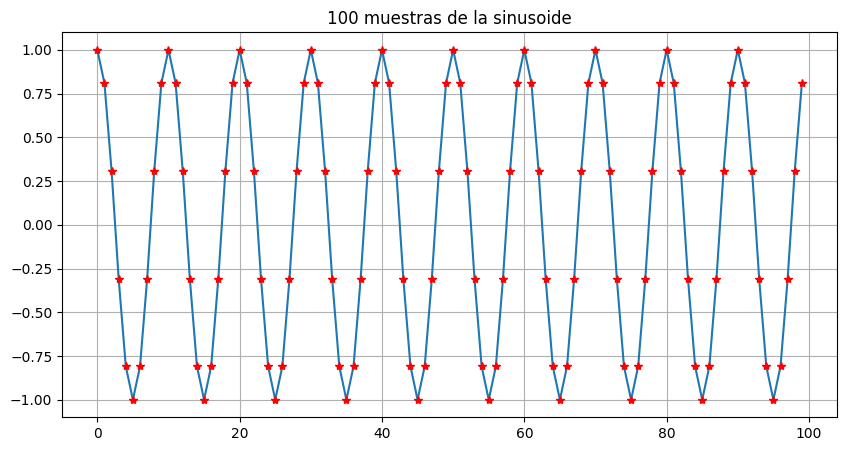

In [40]:
# Generación de una sinusoide
Ain =1
f_0 = 0.1 # Son frecuencias digitales, por tanto menores que 0.5
n=np.arange(50000) # Muchas muestras para estimar bien potencia de salida
x=Ain*np.cos(2*math.pi*f_0*n)

_=plt.plot(x[1000:1100])
_=plt.plot(x[1000:1100],'*r')
_=plt.grid()
_=plt.title('100 muestras de la sinusoide')

In [41]:
# Obtener la señal a la salida del filtro B3,A3
# si introducimos la sinusoide, su potencia y amplitud

out = None # Muestras de la señal de salida
Pout = None # Potencia de la señal de salida
Aout = None # Amplitud de la señal salida
### BEGIN SOLUTION
# Se les hace en clase, enfatizando cómo se filtra una señal.

out=signal.lfilter(B3,A3,x)
Pout = np.mean(out**2)
Aout=math.sqrt(Pout*2.0)
### END SOLUTION



La ganancia en amplitud a la frecuencia 0.1 vale 0.34


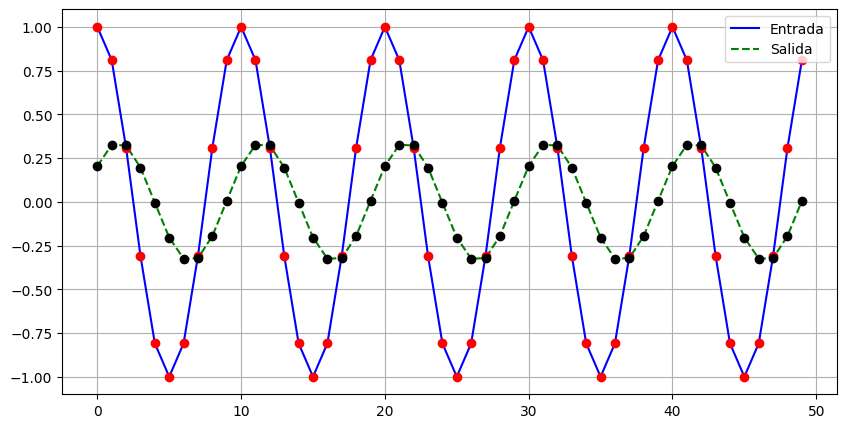

In [42]:
# Compruebe que no da errores
### BEGIN TESTS
assert out is not None and Pout is not None and Aout is not None
assert np.max(np.abs(out))>0.3 and np.max(np.abs(out))<0.38,"out no es correcto"
assert abs(Pout - Aout**2/2) < 1e-4, "Pout incorrecto"
### END TESTS

# Vemos las muestras de la señal de entrada y de la salida
_=plt.plot(x[1000:1050],'b')
_=plt.plot(out[1000:1050],'g--')
_=plt.plot(x[1000:1050],'or')


_=plt.plot(out[1000:1050],'ok')
_=plt.legend(['Entrada', 'Salida'])
_=plt.grid()

# Cálculo del módulo de la respuesta en frecuencia a f_0
print(f'La ganancia en amplitud a la frecuencia {f_0:.1f} vale {Aout/Ain:.2f}')

Vemos que la amplitud de la señal de salida es la misma que la de la entrada multiplicada por un factor < 1

Vista la idea haremos una función que repita lo anterior para disintas frecuencias

* La frecuencia mínima será f=0.01

* La frecuencia máxima será f=0.48

* El número  de frecuencias será un parámetro

In [45]:
mylogger.log("Programando resp_frecuencia...")

def resp_frecuencia(B,A,num_frecuencias):
    ''' Recibe:
          B, A coeficientes del filtro
          num_frecuencias donde se evalua la respuesta en frecuencia
    
        Devuelve:
          ganancias:  array de numpy  de num_frecuencias elementos con las ganancias medidas
          frecuencias:  array de numpy  de num_frecuencias elementos con las frecuencias en las que se mide
    '''


    frecuencias = np.linspace(0.01,0.48,num_frecuencias)
    n=np.arange(5000) # instantes de tiempo
    Ain = 1

    ganancias = None
    ### BEGIN SOLUTION
    ganancias=[]
    for f in frecuencias:
        x=Ain*np.cos(2*math.pi*f*n)
        y=signal.lfilter(B,A,x)
        if f!=0:
            Pot_out = np.mean(y**2)
            Aout=math.sqrt(Pot_out*2.0)
        else:
            Aout = np.mean(y)
        ganancias.append(Aout/Ain)

    ganancias = np.array(ganancias)
### END SOLUTION 
    return ganancias,frecuencias



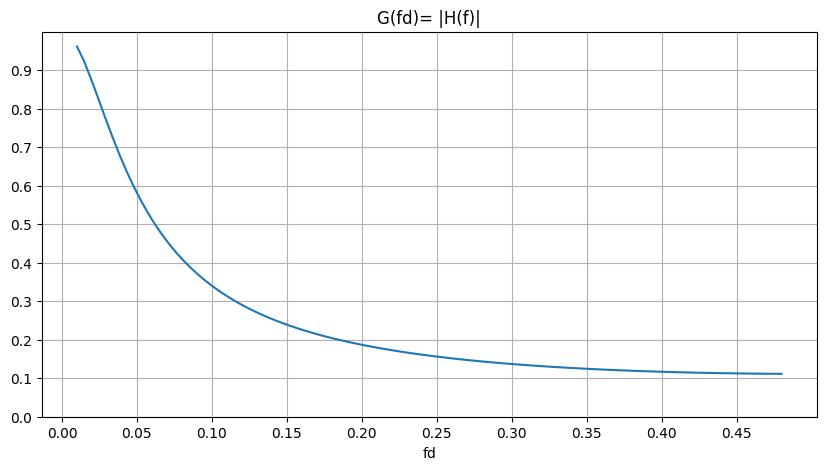

In [53]:
# Comprobamos el funcionamiento de la función
mylogger.log("Testing resp_frecuencia")
num_frecs = 100
G,frecs = resp_frecuencia(B3,A3,num_frecs)

### BEGIN TESTS
assert G is not None,"Función no implementada"

assert type(G)==type(np.ones(2)), "La ganancia debe ser un array de numpy"
assert len(G) == num_frecs, "La cantidad de elementos de la ganancia debe coincidir con num_frecuencias"
assert frecs.shape == G.shape, "Los tamaños de G y frecs deben coincidir"
assert np.max(G) < 1 and np.min(G)>0.1,"Valores de G incorrectos"
### END TESTS

### BEGIN HIDDEN TESTS
### AUTOTEST resp_frecuencia(B2,A3,133)
### END HIDDEN TESTS

mylogger.log("Success Testing resp_frecuencia")

_=plt.plot(frecs,G)
_=plt.grid()
_=plt.ylim(0,1)
_=plt.yticks(np.arange(0,1,0.1))
_=plt.xticks(np.arange(0,0.5,0.05))
_=plt.xlabel('fd')
_=plt.title('G(fd)= |H(f)|')

Compruebe que la gráfica tiene un aspecto similar a:

<img title="Resp Frec" alt="Resp Frec" src="images/resp_frec.png" width=500  >


____________________________


### Cuestión

Considere el filtro [B3,A3]. Suponga que en dicho filtro se introduce a la entrada una sinusoide

* *Ain=2*

* *frec_in=0.35*

**Usando la gráfica anterior**, determinar los parámetros de la sinusoide a la salida del filtro

* *Aout = ????*

* *frec_out= ???*

In [63]:
Aout=None
frec_out = None

mylogger.log("Respondiendo analisis grafica")
### BEGIN SOLUTION
#Valores aproximados En la corrección se aplican tolerancias grandes
frec_out = 0.35
Aout = 2*0.15
### END SOLUTION

In [62]:
# Celda de corrección automática. No escribir

### BEGIN HIDDEN TESTS
assert abs(frec_out - 0.35) < 0.01
assert Aout > 2*0.1 and Aout < 2*0.2
### END HIDDEN TESTS


_______________


### Cuestión

Considere el filtro dado por B1, A1.

* Dibujar la respuesta en frecuencia

* En base a la gráfica indicar True/False a cada una de las cuestiones

In [59]:
# Dibujar respuesta en frecuencia de B1,A1
mylogger.log("Dibujando Resp Frec B1,A1")



In [60]:
mylogger.log("Respondiendo Resp Frec B1,A1")

es_paso_bajo = None # Responder True o False
es_paso_alto = None # Responder True o False
es_paso_banda = None # Responder True o False

### BEGIN SOLUTION
es_paso_bajo = True
es_paso_alto = False
es_paso_banda = False
### END SOLUTION


In [61]:
# Celda de corrección automática. No escribir
mylogger.log("Testing Resp Frec B1,A1")
### BEGIN HIDDEN TESTS
assert es_paso_bajo and not es_paso_alto and not es_paso_banda
### END HIDDEN TESTS
mylogger.log("Success Testing Resp Frec B1,A1")